# Workbook 3

In [53]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq

In [54]:
delta_x = 1
def ddx(f, dx):
    dfdx = ( np.roll( f, -1 ) - np.roll(f, 1) ) / (2 * dx)
    
    return dfdx

def d3dx3(u, dx):
    dx = delta_x
    d3udx3 = (- 0.5 * np.roll(u, 2) + np.roll(u, 1)
    - np.roll(u, -1) + 0.5 * np.roll(u, -2)) / ( delta_x**3 )
    
    return d3udx3

In [55]:
# Make a function
alpha = 0.1

# checking the choice of dt and dx

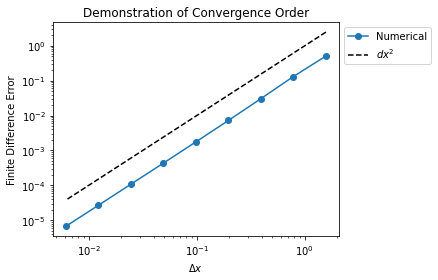

In [56]:
Nmodes = 1

def f(x):
    return np.sin(Nmodes * x)

def f_prime3(x):
    return - (Nmodes**3) * np.cos(Nmodes * x) 

Lx = 2*np.pi
Nxs = np.power(2, np.arange(2, 11))

# Create some arrays to store the error values
err_4 = np.zeros(Nxs.shape)
errspec1 = np.zeros(Nxs.shape)

for Nx, ind in zip(Nxs, range(len(Nxs))):
    
    # Grid with chosen resolution
    x  = np.linspace(0, Lx, Nx)[:-1]
    Delta_x = x[1] - x[0]
    
    # Function to differentiation
    y  = f(x)

    # True derivative
    yp = f_prime3(x)

    # Compute the numerical derivatives
    Ord4 = (- 0.5 * np.roll(y, 2) + np.roll(y, 1) - np.roll(y, -1) + 0.5 * np.roll(y, -2) ) / ( Delta_x**3 )
    # Store the error in the derivatives
    err_4[ind] = np.sqrt(np.mean( (Ord4 - yp)**2 ))

# plt.plot(Lx/Nxs, err_2, '-o', label='2nd order')
plt.plot(Lx/Nxs, err_4, '-o', label='Numerical')
plt.plot(Lx/Nxs, (Lx/Nxs)**2, '--k', label='$dx^2$')
# plt.axhline(y=10**(-3), color='r', linestyle='--')

# plt.arxvline(10**-3)
# plt.plot(Lx/Nxs, (Lx/Nxs)**4, '-.k', label='$dx^4$')

plt.legend(bbox_to_anchor=(1., 0, 0.25, 1))
plt.xlabel('$\Delta x$')
plt.ylabel('Finite Difference Error')
plt.xscale('log')
plt.yscale('log')
plt.title('Demonstration of Convergence Order')

plt.tight_layout()
plt.savefig("question4_error_convergence", dpi=400)

# Question 4 (b)
## CFL and Nx Values

In [13]:
def question4(Nx=32, CFL=.1, save = False, filename= " ", scale_dt= False, dt_value=1, return_result = False):
    # Final time of the simulation
    final_time = 50.
    # Number of points in the computational grid
    Nx = Nx
    # CFL factor
    CFL = CFL
    # PDE Parameters
    alpha = 0.1
    Lx = 10.
    # dx and dt
    delta_x = Lx / Nx
    # dt = 10(\Delta x)^3

    if scale_dt is True:
        delta_t = dt_value
    else:
        delta_t = CFL * (1/alpha)* delta_x**3
    
    
    # print("Delta t {}".format(delta_t))
    print("Delta t = {0:g}, Delta x = {1:g}".format(delta_t, delta_x))

    # Create spatial grid
    x = np.arange(delta_x / 2. - Lx/2, Lx/2, delta_x)
    # Specify the number of time points to store (Nouts)
    #  they will be equally spaced throughout the simulation.
    Nouts = 200
    output_interval = final_time / Nouts
    t = np.zeros(Nouts + 1)
    t[0] = 0.

    # Create an array to store the solution, and write in the initial conditions
    solution = np.zeros((Nouts + 1,Nx))
    solution[0,:] = np.sin( 4 * np.pi * x / Lx ) + 0.25 * np.sin( 8 * np.pi * x / Lx )

    # # plotting initial fn
    # plt.plot( x, solution[0,:], '-o' )
    # plt.show()

    # compute the numerical solution
    curr_time = t[0]
    u = solution[0,:]

    next_output_time = output_interval
    output_number = 0
    while curr_time < final_time:
        
        # Compute the RHS of the ODE
        # ∂tu = α∂xxxu;
        d3udx3 = d3udx3 = (- 0.5 * np.roll(u, 2) + np.roll(u, 1)- np.roll(u, -1) + 0.5 * np.roll(u, -2)) / ( delta_x**3 )
        # dudt = alpha * d3dx3(u= u, dx= delta_x)
        dudt = alpha * d3udx3
        
        # Update first-order record
        u = u + delta_t * dudt
        
        # Increase 'time' by Delta t
        curr_time = curr_time + delta_t
        
        # Store the new values in our array, if at the right time
        if curr_time >= next_output_time:
            output_number = output_number + 1
            next_output_time += output_interval
            
            solution[output_number,:] = u
            t[output_number] = curr_time
        
    # Helps to avoid odd errors from funky step sizes
    t = t[:output_number]
    solution = solution[:output_number,:]
    print( "The stored solution has {0:d} time points and {1:d} space points.".format(*solution.shape) )
    print(np.shape(solution))
    # Plot the soln
    cv = np.max( np.abs( solution[0,:] ) )
    plt.pcolormesh( x, t, solution, vmin = -cv, vmax = cv)

    cbar = plt.colorbar()
    cbar.ax.set_ylabel('u')
    plt.title(r"""Solution using Nx = {} , CFL = {}
    $\Delta t$ = {:g}, $\Delta x$ = {:g}""".format(Nx, CFL,delta_t, delta_x))
    plt.xlabel('x')
    plt.ylabel('time')

    if save is True:
        np.savez(filename, u = solution, time = t, x = x, U0 = U0)
    
    if return_result is True:
        return solution, t, x, delta_x

Delta t = 4.76837e-05, Delta x = 0.15625
The stored solution has 200 time points and 64 space points.


/Users/vashisth/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


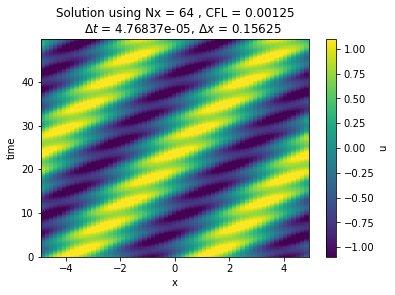

In [10]:
question4(Nx = 64, CFL = 0.00125)

Delta t = 9.53674e-05, Delta x = 0.15625
The stored solution has 200 time points and 64 space points.


/Users/vashisth/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


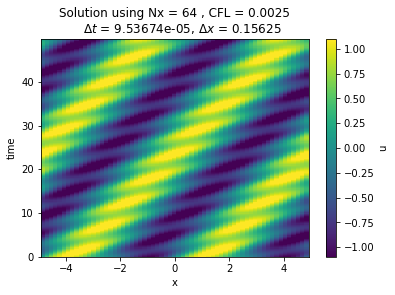

In [108]:
question4(Nx = 64, CFL = 0.0025)

Delta t = 0.000190735, Delta x = 0.15625
The stored solution has 200 time points and 64 space points.


/Users/vashisth/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


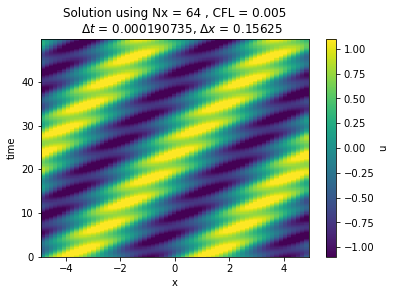

In [109]:
question4(Nx = 64, CFL = 0.005)

Delta t = 0.00038147, Delta x = 0.15625
The stored solution has 200 time points and 64 space points.


/Users/vashisth/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


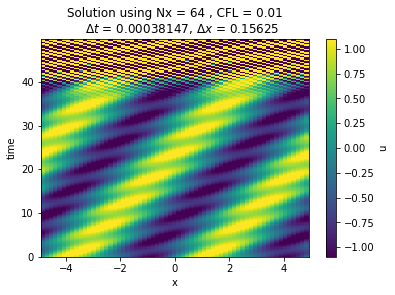

In [110]:
question4(Nx = 64, CFL = 0.01)

In [111]:
9.53674/ 4.76837 # so 0.005 for dt is a good choice

2.0

Delta t = 2.38419e-05, Delta x = 0.078125
The stored solution has 200 time points and 128 space points.


/Users/vashisth/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


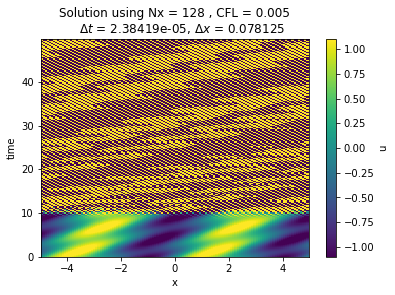

In [112]:
question4(Nx = 128, CFL = 0.005)

Delta t = 0.00152588, Delta x = 0.3125
The stored solution has 200 time points and 32 space points.


/Users/vashisth/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


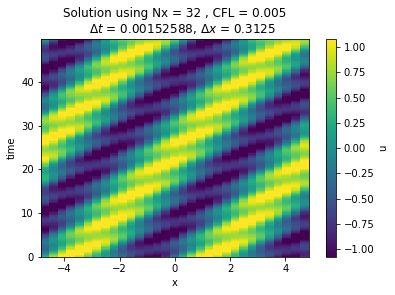

In [113]:
question4(Nx = 32, CFL = 0.005)

# 4c

## [2a]: Describe the behaviour wrt to fourier 
Using your understanding of representing functions as Fourier sums, how / what does this analysis reveal about the behaviour of the system? What temporal behaviour does it describe? Does it depend on wavenumber k?

$$u = exp[i(kx - \alpha k^3 t)]$$
$$ u = \frac{e^{ikx}}{e^{i\alpha k^3 t}} $$

$\textbf{HOW TF DO I EXPLAIN THIS}$

# 4d

## [2b] Qualitatively describe how the system evolves. How do these results compare with your Fourier analysis from part (a)?
How do these results compare with your Fourier analysis from part (a)?

$\textbf{Does it oscillate in both?}$
- It oscillates in both, we can be seen from the expression:
$$ u = \frac{e^{ikx}}{e^{i\alpha k^3 t}} $$
as we see two oscillatory terms both in time and space. The oscillatory nature is apparent when we consider the exponentials in the light of the Euler identity.

$\textbf{Is it consistent with your Fourier analysis in part(a)}$
IDK how to do this %write here

# 4e

Delta t = 0.00038147, Delta x = 0.15625
The stored solution has 200 time points and 64 space points.
(200, 64)


/Users/vashisth/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


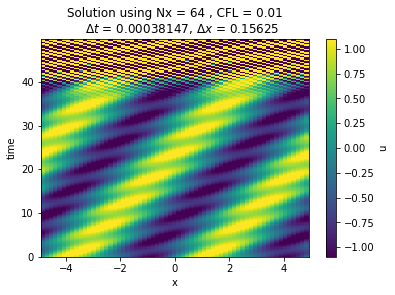

In [48]:
question4(Nx = 64, CFL = 0.005*2, return_result= False)

Delta t = 0.000190735, Delta x = 0.15625
The stored solution has 200 time points and 64 space points.
(200, 64)


/Users/vashisth/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


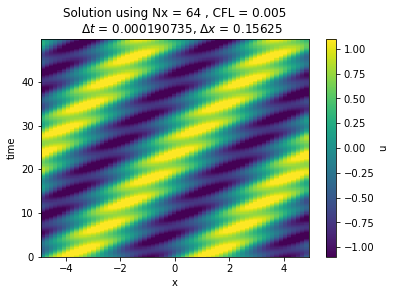

In [14]:
solution, t, x, delta_x = question4(Nx = 64, CFL = 0.005, return_result= True)

Delta t = 9.53674e-05, Delta x = 0.15625
The stored solution has 200 time points and 64 space points.
(200, 64)


/Users/vashisth/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:76: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


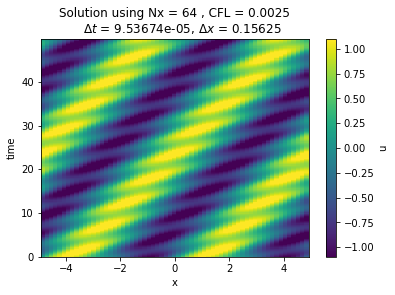

In [9]:
question4(Nx = 64, CFL = 0.005/2, return_result= False)

In [31]:
np.shape( solution[:,0] ), np.shape(t)

((200,), (200,))

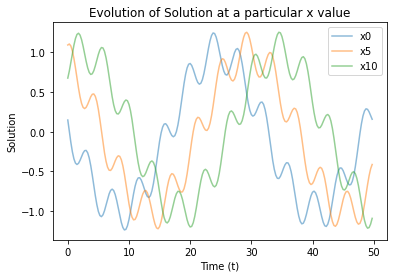

In [46]:
plt.plot(t, solution[:,0] , label="x0", alpha =0.5)
plt.plot(t, solution[:,5] , label="x5",alpha =0.5)
plt.plot(t, solution[:,10] , label="x10",alpha =0.5)
plt.xlabel("Time (t)")
plt.ylabel("Solution")
plt.title("Evolution of Solution at a particular x value")
plt.legend()

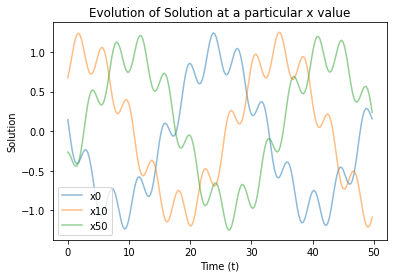

In [47]:
plt.plot(t, solution[:,0] , label="x0", alpha =0.5)
plt.plot(t, solution[:,10] , label="x10",alpha =0.5)
plt.plot(t, solution[:,50] , label="x50",alpha =0.5)

plt.xlabel("Time (t)")
plt.ylabel("Solution")
plt.title("Evolution of Solution at a particular x value")
plt.legend()

In [45]:
# plt.plot(x, solution[0,:] , label="t0")
# # plt.plot(x, solution[20,:] , label="t5")
# plt.plot(x, solution[10,:] , label="t10")
# plt.xlabel("Space (x)")
# plt.ylabel("Evolution of Solution at a particular t value")
# plt.legend()

In [40]:
solution, x, delta_x = question4(Nx = 64, CFL = 0.005, return_result= True)

((200, 64), (64,))

# Energy

In [57]:
def energy(cfl):
    # Final time of the simulation
    final_time = 50.
    # Number of points in the computational grid
    Nx = 64
    # CFL factor
    CFL = cfl
    # PDE Parameters
    alpha = 0.1
    Lx = 10.
    # dx and dt
    delta_x = Lx / Nx
    # dt = 10(\Delta x)^3
    delta_t = CFL * (1/alpha)* delta_x**3

    # print("Delta t {}".format(delta_t))
    print("Delta t = {0:g}, Delta x = {1:g}".format(delta_t, delta_x))

    # Create spatial grid
    x = np.arange(delta_x / 2. - Lx/2, Lx/2, delta_x)
    # Specify the number of time points to store (Nouts)
    #  they will be equally spaced throughout the simulation.
    Nouts = 200
    output_interval = final_time / Nouts
    t = np.zeros(Nouts + 1)
    t[0] = 0.

    # Create an array to store the solution, and write in the initial conditions
    solution = np.zeros((Nouts + 1,Nx))
    solution[0,:] = np.sin( 4 * np.pi * x / Lx ) + 0.25 * np.sin( 8 * np.pi * x / Lx )

    # compute the numerical solution
    curr_time = t[0]
    u = solution[0,:]

    next_output_time = output_interval
    output_number = 0
    while curr_time < final_time:
        
        # Compute the RHS of the ODE
        # ∂tu = α∂xxxu;
        d3udx3 = d3udx3 = (- 0.5 * np.roll(u, 2) + np.roll(u, 1)- np.roll(u, -1) + 0.5 * np.roll(u, -2)) / ( delta_x**3 )
        # dudt = alpha * d3dx3(u= u, dx= delta_x)
        dudt = alpha * d3udx3
        
        # Update first-order record
        u = u + delta_t * dudt

        # Increase 'time' by Delta t
        curr_time = curr_time + delta_t
        
        # Store the new values in our array, if at the right time
        if curr_time >= next_output_time:
            output_number = output_number + 1
            next_output_time += output_interval
            
            solution[output_number,:] = u
            t[output_number] = curr_time

    # Helps to avoid odd errors from funky step sizes
    t = t[:output_number]
    solution = solution[:output_number,:]
    print( "The stored solution has {0:d} time points and {1:d} space points.".format(*solution.shape) )
    print(np.shape(solution))
    # Plot the soln
    energy = np.sum(solution**2 *delta_x, axis = 1) 
    return energy

In [58]:
cfl = [0.00125*(2**i) for i in range(8)]


In [60]:
# energy1 = np.trapz(y = u[:,] * u[:,], x=x, dx=delta_x)
energy_list = [energy(i) for i in cfl]

Delta t = 4.76837e-05, Delta x = 0.15625
The stored solution has 200 time points and 64 space points.
(200, 64)
Delta t = 9.53674e-05, Delta x = 0.15625
The stored solution has 200 time points and 64 space points.
(200, 64)
Delta t = 0.000190735, Delta x = 0.15625
The stored solution has 200 time points and 64 space points.
(200, 64)
Delta t = 0.00038147, Delta x = 0.15625
The stored solution has 200 time points and 64 space points.
(200, 64)
Delta t = 0.000762939, Delta x = 0.15625
The stored solution has 200 time points and 64 space points.
(200, 64)
Delta t = 0.00152588, Delta x = 0.15625
The stored solution has 200 time points and 64 space points.
(200, 64)
Delta t = 0.00305176, Delta x = 0.15625
The stored solution has 200 time points and 64 space points.
(200, 64)
Delta t = 0.00610352, Delta x = 0.15625
The stored solution has 200 time points and 64 space points.
(200, 64)


/Users/vashisth/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: overflow encountered in square


Text(0.5, 1.0, 'Energy vs time')

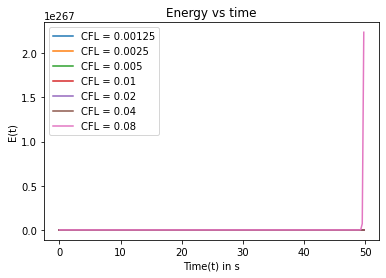

In [ ]:
for i in range(len(cfl)-1):
    plt.plot(t, energy_list[i], label="CFL = {}".format(cfl[i]))

plt.ylabel("E(t)")
plt.xlabel("Time(t) in s")
plt.legend()
plt.title("Energy vs time")

Text(0.5, 1.0, 'Energy vs time')

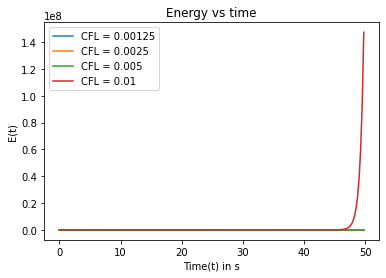

In [ ]:
for i in range(len(cfl)-4):
    plt.plot(t, energy_list[i], label="CFL = {}".format(cfl[i]))

plt.ylabel("E(t)")
plt.xlabel("Time(t) in s")
plt.legend()
plt.title("Energy vs time")

Delta t = 2.38419e-05, Delta x = 0.15625
The stored solution has 200 time points and 64 space points.
(200, 64)


Text(0.5, 1.0, 'Energy vs time')

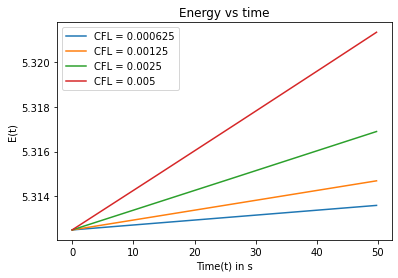

In [61]:
plt.plot(t, energy(0.00125/2), label="CFL = {}".format(0.00125/2))

for i in range(len(cfl)-5):

    plt.plot(t, energy_list[i], label="CFL = {}".format(cfl[i]))

plt.ylabel("E(t)")
plt.xlabel("Time(t) in s")
plt.legend()
plt.title("Energy vs time")